In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load Audio Files
prefix = "../songs/"
cfm_file = prefix + "cfm.wav"
fancy_file  = prefix + "fancy.wav"
pw_file = prefix + "pw.wav"

In [1]:
#ipd.Audio(cfm_file)

In [2]:
#ipd.Audio(fancy_file)

In [3]:
#ipd.Audio(pw_file)

In [4]:
cfm, sr = librosa.load(cfm_file)
fancy, _ = librosa.load(fancy_file)
pw, _ = librosa.load(pw_file)

In [14]:
# Samples In file
print(cfm.size)
print(fancy.size)
print(pw.size)

4502528
4775424
4030464


In [15]:
# Duration of 1 sample

sample_duration = 1/sr
print(f"Duration of 1 sample is: {sample_duration:.6f} seconds")

Duration of 1 sample is: 0.000045 seconds


In [17]:
#duration of the signal in seconds
duration_cfm = sample_duration * len(cfm)
duration_fancy = sample_duration * len(fancy)
duration_pw = sample_duration * len(pw)
print(f"Duration of cfm signal is: {duration_cfm:.2f} seconds")
print(f"Duration of fancy signal is: {duration_fancy:.2f} seconds")
print(f"Duration of pw signal is: {duration_pw:.2f} seconds")

Duration of cfm signal is: 204.20 seconds
Duration of fancy signal is: 216.57 seconds
Duration of pw signal is: 182.79 seconds


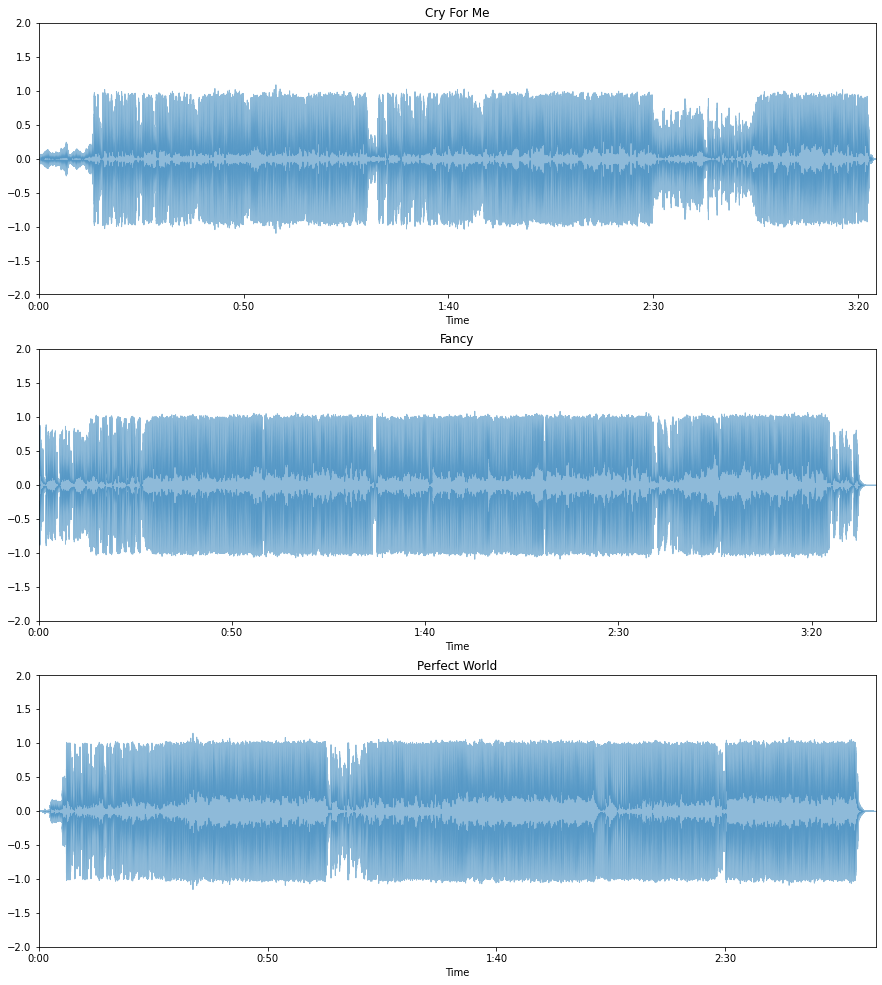

In [24]:
# Visualise The Waveforms

plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.waveplot(cfm, alpha=0.5)
plt.title("Cry For Me")
plt.ylim((-2,2))

plt.subplot(3,1,2)
librosa.display.waveplot(fancy, alpha=0.5)
plt.title("Fancy")
plt.ylim((-2,2))


plt.subplot(3,1,3)
librosa.display.waveplot(pw, alpha=0.5)
plt.title("Perfect World")
plt.ylim((-2,2))

plt.show()

In [5]:
# Calculate the amplitute envelope
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    amp_env = []
    
    # Calculate AE for each frame
    for i in range(0, len(signal), hop_length):
        current_frame_amp_env = max(signal[i:i+frame_size])
        amp_env.append(current_frame_amp_env)
        
    return np.array(amp_env)


def fancy_amplitude_envelope(signal, frame_size, hop_length):
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [6]:
ae_cfm = amplitude_envelope(cfm, FRAME_SIZE, HOP_LENGTH)

In [7]:
len(ae_cfm)

8794

In [8]:
fae_cfm = fancy_amplitude_envelope(cfm, FRAME_SIZE, HOP_LENGTH)

In [9]:
len(fae_cfm)

8794

In [10]:
ae_fancy = fancy_amplitude_envelope(fancy, FRAME_SIZE, HOP_LENGTH)
ae_pw = fancy_amplitude_envelope(pw, FRAME_SIZE, HOP_LENGTH)


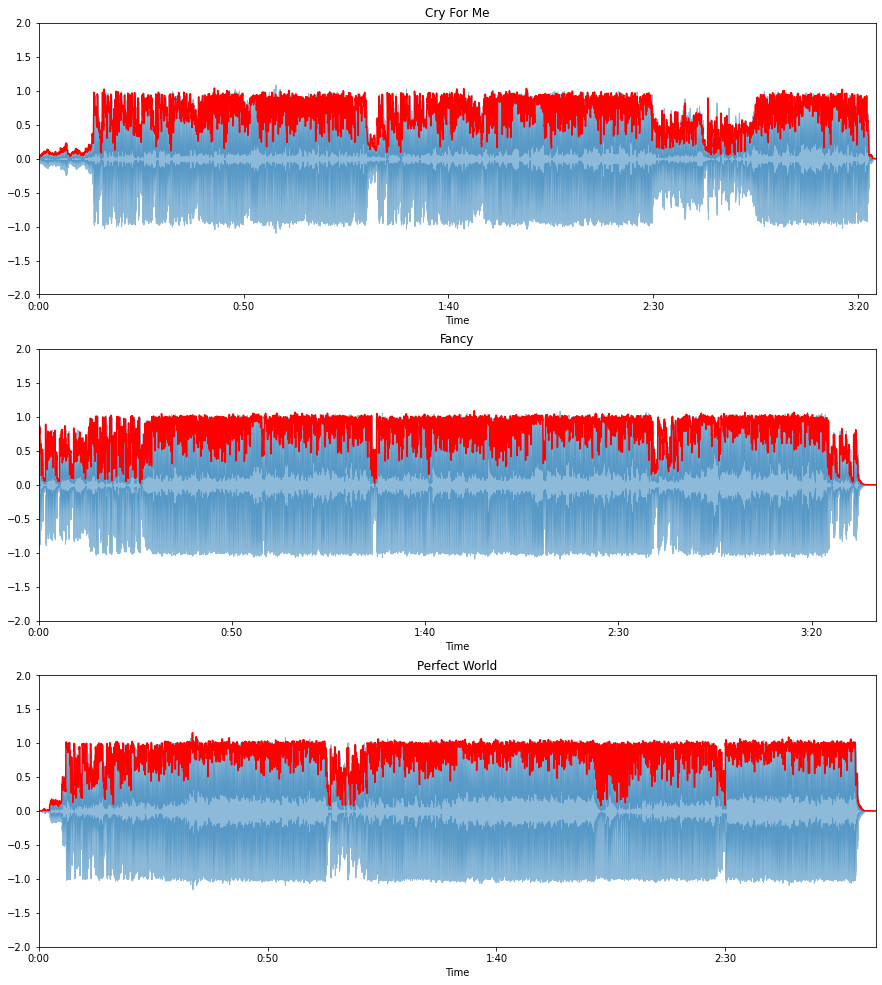

In [11]:
# Visualise all the ae for each audio file

frames_cfm = range(0, ae_cfm.size)
t_cfm = librosa.frames_to_time(frames_cfm, hop_length=HOP_LENGTH)

frames_fancy = range(0, ae_fancy.size)
t_fancy = librosa.frames_to_time(frames_fancy, hop_length=HOP_LENGTH)

frames_pw = range(0, ae_pw.size)
t_pw = librosa.frames_to_time(frames_pw, hop_length=HOP_LENGTH)

plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.waveplot(cfm, alpha=0.5)
plt.plot(t_cfm, ae_cfm, color="r")
plt.title("Cry For Me")
plt.ylim((-2,2))

plt.subplot(3,1,2)
librosa.display.waveplot(fancy, alpha=0.5)
plt.plot(t_fancy, ae_fancy, color="r")
plt.title("Fancy")
plt.ylim((-2,2))


plt.subplot(3,1,3)
librosa.display.waveplot(pw, alpha=0.5)
plt.plot(t_pw, ae_pw, color="r")
plt.title("Perfect World")
plt.ylim((-2,2))

plt.show()